# Proyecto: Análisis Exploratorio de Datos - calidad de vinos

<img src=/work/edawine.png>

Esta notebook es parte de un Proyecto de la [Escuela de Data Science e Inteligencia Artificial de Platzi](https://platzi.com/datos).

Todos los detalles [aquí](https://platzi.com/blog/ejercicio-eda-wine).

## Instrucciones generales

a) Sigue el paso a paso de cada sección. Para ello tendrás que leer indicaciones para saber qué hacer en cada etapa del EDA.

b) Completa el código en las celdas correspondientes para realizar tu análisis exploratorio de datos (EDA). Por ejemplo, encontrarás código incompleto marcado con guiones bajos (____):


In [1]:
school = 'Platzi'
print(school) # Incluir la variable declarada anteriormente.

Platzi


c) Escribe el código que veas conveniente para desarrollar lo que se pida en el EDA. Encontrarás secciones sin ninguna guía de código para que con tu creatividad uses las herramientas que veas necesarias.

d) No te límites. Agrega bloques de código y de Markdown cuando lo necesites.

e) Al final de cada sección encontrarás clases específicas de cursos de Platzi. Recuerda que en esos cursos es donde puedes aprender cómo resolver el proyecto. Puedes consultar las clases de manera directa para resolver tus dudas al momento.

f) También recuerda que puedes tomar todos esos cursos antes o utilizarlos como fuente de consulta:

- [Curso Básico de Python](https://platzi.com/cursos/python/)
- [Curso de Entorno de Trabajo para Ciencia de Datos con Jupyter Notebooks y Anaconda](https://platzi.com/cursos/jupyter-notebook/)
- [Curso de Python Intermedio: Comprehensions, Lambdas y Manejo de Errores](https://platzi.com/cursos/python-intermedio/)
- [Curso de Principios de Visualización de Datos para Business Intelligence](https://platzi.com/cursos/visualizacion-datos/)
- [Curso Básico de Manipulación y Transformación de Datos con Pandas y NumPy](https://platzi.com/cursos/pandas-numpy/)
- [Curso Básico de Visualización de Datos con Matplotlib y Seaborn](https://platzi.com/cursos/matplotlib-seaborn/)
- [Curso de Funciones Matemáticas para Data Science e Inteligencia Artificial](https://platzi.com/cursos/funciones-matematicas/)
- [Curso de Matemáticas para Data Science: Estadística Descriptiva](https://platzi.com/cursos/estadistica-descriptiva/)
- [Curso de Análisis Exploratorio de Datos](https://platzi.com/cursos/analisis-exploratorio-datos/)


## Conoce los datos - Vinho Verde

1. Lee esta información para tener contexto de los datos que se usarán:

Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino rojo del vino portugués "Vinho Verde".

<img src=/work/Large186.jpg>

La fuente de estos datasets son del Machine Learning Repository de UCI. Puedes conocer más de ellos [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Input variables (based on physicochemical tests):
1. fixed acidity / acidez fija
La mayoría de los ácidos involucrados con el vino o fijos o no volátiles (no se evaporan fácilmente).

2. volatile acidity / acidez volátil
La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3. citric acid / ácido cítrico
Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4. residual sugar / azúcar residual
La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5. chlorides / cloruros
La cantidad de sal en el vino.

6. free sulfur dioxide / dióxido de azufre libre
La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7. total sulfur dioxide / dióxido de azufre total
Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8. density / densidad
La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9. pH / pH
Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10. sulphates / sulfatos
Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11. alcohol / alcohol
El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12. quality / calidad
Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.

## Importar librerías

1. Ejecuta la siguiente celda para importar librerías.

Estas son las librerías de Python esenciales para ejecutar tu EDA. Mientras desarrolles el proyecto puedes agregar las que veas conveninente. 

Puedes usar cualquiera que conozcas del lenguaje Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
# agrega librerías que necesites

### *Clases sugeridas*:

- [Google Colab: primeros pasos](https://platzi.com/clases/2434-jupyter-notebook/40386-google-colab-primeros-pasos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Google Colab: ciencia de datos](https://platzi.com/clases/2434-jupyter-notebook/40387-google-colab-ciencia-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Utiliza Deepnote](https://platzi.com/clases/2434-jupyter-notebook/40388-utilizar-deepnote/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Carga de datos

1. Carga los datasets directo de sus URL como se muestran en la siguiente celda.

Nota: alternativamente podríamos cargar los datos con los archivos csv, pero con las URL los podemos tener de forma más directa desde la fuente.

In [3]:
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

2. Utiliza Pandas para crear tus DataFrames utilizando las dos variables que creaste para cargar los datos. 

Toma en cuenta que el delimiter de los archivos csv es `;`

In [4]:
red = pd.read_csv(url_wine_red, delimiter=";")
white = pd.read_csv(url_wine_white, delimiter=";")

3. Carga las primeras 5 filas de ambos DataFrames.

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### *Clases sugeridas*:

- [Series y DataFrames en Pandas](https://platzi.com/clases/2912-pandas-numpy/47984-series-y-dataframes-en-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Leer archivos CSV y JSON con Pandas](https://platzi.com/clases/2912-pandas-numpy/47985-leer-archivos-csv-y-json-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Combina ambos DataFrames

1. Incluye una variable llamada `category` a cada DataFrame que indiqué si el vino es rojo (red) o blanco (white). Esto servirá para distinguir el tipo de vino de cada fila/registro al unir los DataFrames.

In [7]:
red['category']='red'
white['category']='white'

2. Utiliza Pandas para unir ambos registros de los dos DataFrames.

In [8]:
total_wine=pd.concat([red,white], ignore_index=True)


3. Comprueba que el DataFrame este completo viendo sus primeras filas. Ve que la columna category esté con los datos correctos.

In [9]:
total_wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
1319,9.1,0.76,0.68,1.70,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,red
6090,6.1,0.28,0.23,4.20,0.038,13.0,95.0,0.98898,2.97,0.70,13.1,6,white
2839,7.9,0.14,0.28,1.80,0.041,44.0,178.0,0.99540,3.45,0.43,9.2,6,white
5528,6.6,0.32,0.47,15.60,0.063,27.0,173.0,0.99872,3.18,0.56,9.0,5,white
4742,5.5,0.19,0.27,0.90,0.040,52.0,103.0,0.99026,3.50,0.39,11.2,5,white
2260,6.8,0.25,0.34,14.00,0.032,47.0,133.0,0.99520,3.37,0.50,12.2,7,white
369,9.4,0.27,0.53,2.40,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7,red
1692,6.9,0.21,0.33,1.80,0.034,48.0,136.0,0.98990,3.25,0.41,12.6,7,white
5070,6.8,0.19,0.40,9.85,0.055,41.0,103.0,0.99532,2.98,0.56,10.5,6,white
5638,6.1,1.10,0.16,4.40,0.033,8.0,109.0,0.99058,3.35,0.47,12.4,4,white


### *Clases sugeridas*:

- [Agregar o eliminar datos con Pandas](https://platzi.com/clases/2912-pandas-numpy/47987-agregar-o-eliminar-datos-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Exploración inicial de los datos y validación

1. Consigue la cantidad de filas y columnas del DataFrame.

In [10]:
total_wine.shape

(6497, 13)

2. Conoce los tipos de datos de cada característica/variable y si tienen valores nulos.

In [11]:
total_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
category                 object
dtype: object

In [12]:
total_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
category                0
dtype: int64

3. Cálcula las estadísticas descriptivas del dataset. Observa a detalle las estadísticas e identifica si existen diferencias altas entre cada percentil y en los percentilees extremos con valores máximos y mínimos de cada característica/variable.

In [13]:
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
describe_in_percentage=total_wine.describe().iloc[2:]/total_wine.mean()*100
describe_in_percentage=round(describe_in_percentage,2).T
describe_in_percentage


,std,min,25%,50%,75%,max
fixed acidity,17.97,52.67,88.70,97.02,106.72,220.36
volatile acidity,48.47,23.55,67.71,85.38,117.76,465.16
citric acid,45.61,0.00,78.46,97.29,122.40,520.98
residual sugar,87.41,11.02,33.07,55.11,148.81,1208.84
chlorides,62.52,16.06,67.82,83.88,116.00,1090.41
free sulfur dioxide,58.15,3.28,55.69,95.00,134.31,946.76
total sulfur dioxide,48.83,5.18,66.53,101.95,134.78,380.15
density,0.30,99.24,99.76,100.02,100.23,104.45
pH,5.00,84.51,96.63,99.74,103.15,124.59
sulphates,28.01,41.41,80.94,96.00,112.94,376.46


In [15]:
total_wine['chlorides'].sort_values(ascending=False).head(20)
total_wine['residual sugar'].sort_values(ascending=False).head(20)
total_wine.iloc[4380] #residual sugar outliers
total_wine.iloc[[258,151]] #chlorides outliers


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,red
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4,red


4. Crea una variable donde almacenarás los valores de la columna `quality`. Revisa sus estadísticas descriptivas principales.

In [16]:
quality = total_wine['quality']

5. Cuenta los valores únicos de la variable `quality`. Para visualizar cómo se comporta e identificar si es una variable discreta o continua.

In [17]:
quality_distribution=quality.value_counts().sort_index()
quality_distribution

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

<AxesSubplot:>

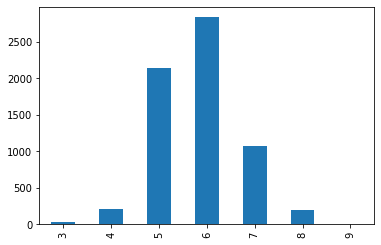

In [18]:
quality_distribution.plot(kind='bar')

6. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

No existen valores nulos en el dataset
Todas las variables a excepción de quality son numéricas
La gran mayoría de los vinos se ubican en un rango de quality de 5 a 7. La menor calificación es 3 y la mayor 9.

### *Clases sugeridas*:

- [Shape y Reshape](https://platzi.com/clases/2912-pandas-numpy/47979-shape-y-reshape/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Funciones principales de Pandas](https://platzi.com/clases/2912-pandas-numpy/47990-funciones-principales-de-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central](https://platzi.com/clases/2353-estadistica-descriptiva/38396-medidas-de-tendencia-central/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38398-medidas-de-tendencia-central-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Categorización de la variable target

En la sección anterior pudiste observar que la variable `quality` es categórica en naturaleza. Crear categorías de calidad nos ayudará a entender mejor cómo se comporta la calidad en los vinos.

En esta sección entenderás mejor la razón de esto y lo ejecutarás.

1. Crea una gráfica tipo countplot de la variable `quality` para ver la cantidad de cada valor de calidad.

Con la visualización anterior es mucho más sencillo de observar cómo se categorizan los valores de calidad en 3 grupos principales (baja, media y alta). 

2. Completa la siguiente función lambda con las condiciones necesarias para agregar una columna al DataFrame donde se indique la categoría de calidad: 'Poor', 'Medium', 'High'. Para ello deberás definir el criterio de rango de valores de cada categoría de acuerdo a lo que observaste en la gráfica anterior.

In [19]:
def quality_category(x):
    if x<6:
        return "Poor"
    elif x>=8:
        return "High"
    else:
        return "Medium"

total_wine['quality_category'] = total_wine['quality'].apply(lambda x:quality_category(x))
total_wine['quality_category'].sample(20)

3303      Poor
2707    Medium
1874    Medium
2472      Poor
5499      Poor
4062    Medium
3967    Medium
4910    Medium
1064    Medium
800       Poor
5377    Medium
3206    Medium
1919    Medium
3024    Medium
5950    Medium
2486    Medium
476       Poor
3593    Medium
2491      Poor
4478    Medium
Name: quality_category, dtype: object

2.1 Redefine el tipo de variable de la nueva columna como tipo 'category'.

In [20]:
total_wine.quality_category=total_wine.quality_category.astype("category")
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

3. Crea una gráfica para visualizar el conteo de datos en cada una de las categorías de calidad del vino.

In [21]:
total_wine['quality_category'].value_counts()

Medium    3915
Poor      2384
High       198
Name: quality_category, dtype: int64

In [22]:
#Quality category by percentage
round(total_wine['quality_category'].value_counts()/total_wine.shape[0]*100,1)


Medium    60.3
Poor      36.7
High       3.0
Name: quality_category, dtype: float64

4. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

Existen 6053 vinos en la categoría medium, 246 en poor y 198 en high. Estos valores representan el 93.2%, 3.8%  y 3.0% respectivamente

### *Clases sugeridas*:

Gráficas

- [Set (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47947-set/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Apply, lambdas, conversión de datos

- [Funciones anónimas: lambdas](https://platzi.com/clases/2255-python-intermedio/36465-funciones-anonimas-lambda/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Apply (Pandas)](https://platzi.com/clases/2912-pandas-numpy/47996-apply/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Tipos de datos (NumPy y Pandas)](https://platzi.com/clases/2912-pandas-numpy/47976-tipos-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

In [23]:
#sns.pairplot(total_wine,hue='category')

Al analizar las distribuciones de datos de  cada una de las variables se observa que los valores medios y la dispersión de los datos son substancialmente diferentes dependiendo de si se trata de vino blanco o vino tinto. Para las variables 'fixed acidity', 'volatile acidity' y 'citric acid' la dispersión de datos es mayor para vino tinto que para el vino blanco. Por otra parte, para la variable 'residual sugar' la dispersión es mayor para vino blanco que para vino tinto. Para el resto de las variables la dispersión de datos es similar pero la media es susbancialmente diferente entre las dos clases de vinos. De todo esto se deduce que la correlación entre las variables de análisis y la calidad del vino va a depender de la clase de vino que estemos a analizando, y por lo tanto, los datasets de vino blanco y tinto tienen que analizarse por separado.

## Manejo de outliers

En una sección anterior tuviste una pista de qué existen outliers en el dataset. 

1. Utiliza el método que veas más conveniente para detectar outliers en tu dataset. Por ejemplo, boxplots, método IQR, etc.

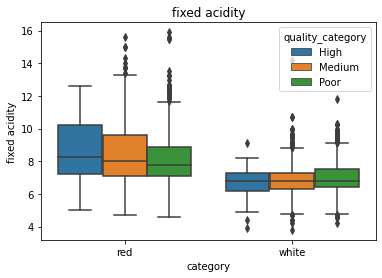

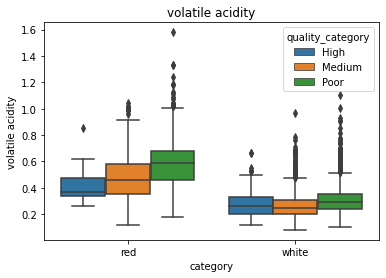

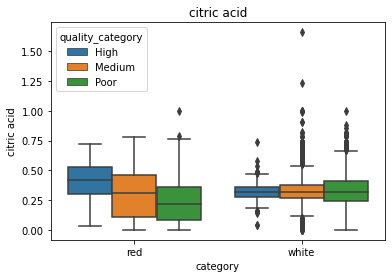

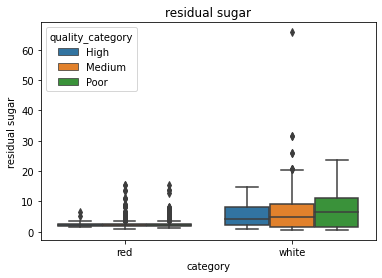

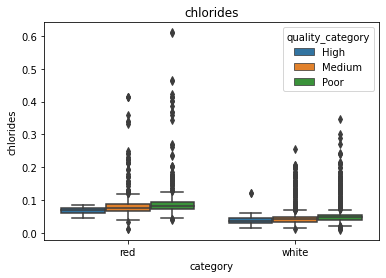

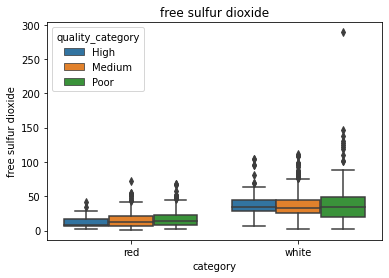

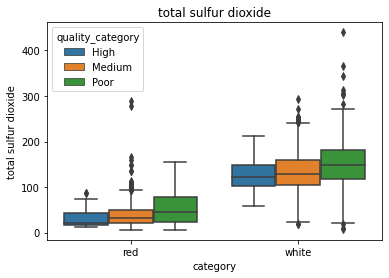

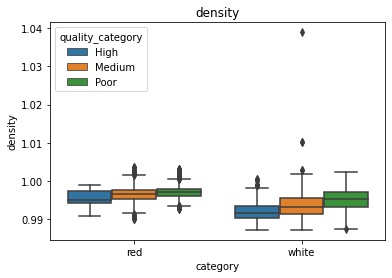

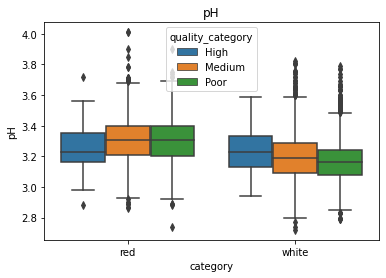

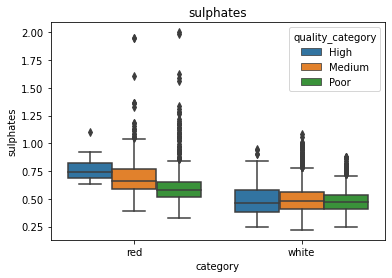

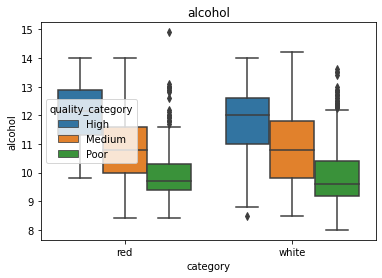

"\nfor column in white.columns[0:-1]:\n    fig,ax=plt.subplots()\n    labels=['white','red']\n    dataset=[white[column],red[column]]\n    ax.set_title('{}'.format(column))\n    ax=plt.boxplot(dataset,labels=labels)\n    plt.show()\n"

In [30]:
#Removing rows with max values for each column
max_indexes=total_wine.groupby('category').idxmax().T.unstack().values
total_wine_with_no_max=total_wine.drop(index=max_indexes)

   
#Seaborn violinplot script
'''
for column in total_wine.columns[:-2]:
    fig,ax=plt.subplots()
    ax.set_title('{}'.format(column))
    ax=sns.violinplot(data=total_wine_with_no_max,x='category',y=column,
    inner="quartile",hue='quality_category')
    plt.show()
'''

#Seaborn boxplot script

for column in total_wine.columns[:-3]:
    fig,ax=plt.subplots()
    ax.set_title('{}'.format(column))
    ax=sns.boxplot(data=total_wine,x='category',y=column,hue='quality_category')
    plt.show()


#Matplotlib boxplot script
'''
for column in white.columns[0:-1]:
    fig,ax=plt.subplots()
    labels=['white','red']
    dataset=[white[column],red[column]]
    ax.set_title('{}'.format(column))
    ax=plt.boxplot(dataset,labels=labels)
    plt.show()
'''

In [25]:
#Function to calculate the lower and upper limit
def outlier_limit(quartil):
    first_quartile=quartil.iloc[0]
    third_quartile=quartil.iloc[1]
    IQR=third_quartile-first_quartile
    lower=IQR-1.5*first_quartile
    upper=IQR+1.5*third_quartile
    
    return lower,upper

quartiles=total_wine.quantile([0.25,0.75])
limits=pd.DataFrame([])
for column in quartiles.columns[0:-2]:
    limits.loc[column,'lower_limit'],limits.loc[column,'upper_limit']=outlier_limit(quartiles[column])
    
limits

,lower_limit,upper_limit
fixed acidity,-8.30000,12.850000
volatile acidity,-0.17500,0.770000
citric acid,-0.23500,0.725000
residual sugar,3.60000,18.450000
chlorides,-0.03000,0.124500
free sulfur dioxide,-1.50000,85.500000
total sulfur dioxide,-36.50000,313.000000
density,-1.48386,1.500135
pH,-4.45500,5.190000
sulphates,-0.47500,1.070000


2. Responde la siguiente pregunta:

a) ¿Ves necesario eliminar estos outliers?


b) ¿Por qué?

No, el número de outliers es tan grande que al eliminarlos creo que se perdería una valiosa información. En un principio, la paración de outliers en las iferentes variables se debe al mismo proceso de fabricación del vino más que a un error de medición

### *Clases sugeridas*:

Estadística descriptiva
- [Medidas de dispersión](https://platzi.com/clases/2353-estadistica-descriptiva/38399-medidas-de-dispersion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Desviación estándar](https://platzi.com/clases/2353-estadistica-descriptiva/38400-desviacion-estandar/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Medidas de dispersión en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38401-medidas-de-dispersion-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas boxplots
- [Crear otro tipo de gráficas (Boxplot en Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47945-crear-otro-tipo-de-graficas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Categóricos (Boxplot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Análisis de correlación entre variables

Ya que conociste el comportamiento esencial de las características y la variable `quality` es momento de conocer cómo se relacionan entre sí para descubrir si alguna(s) pueden afectar a esta calidad.

1. Crea una matriz de correlación de las variables numéricas del dataset.

2. Crea una gráfica tipo heatmap para observar mejor las correlaciones entre variables. 

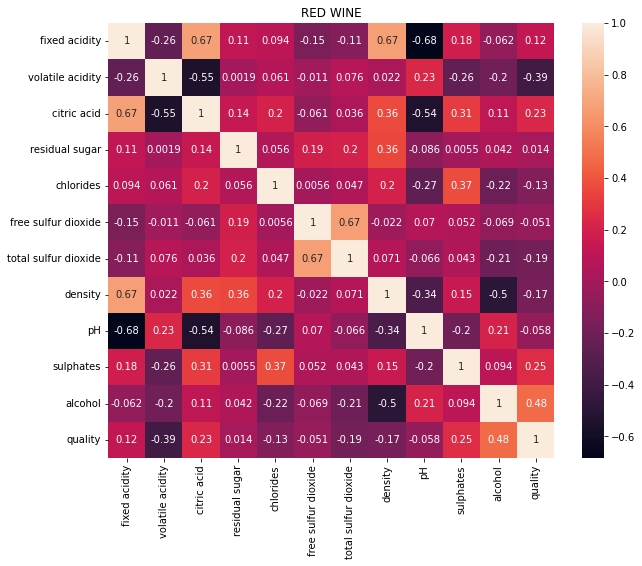

In [26]:

fig,ax1=plt.subplots(figsize=(10,8))
ax1.set_title("RED WINE")
ax1=sns.heatmap(red.corr(),annot=True)
plt.show()


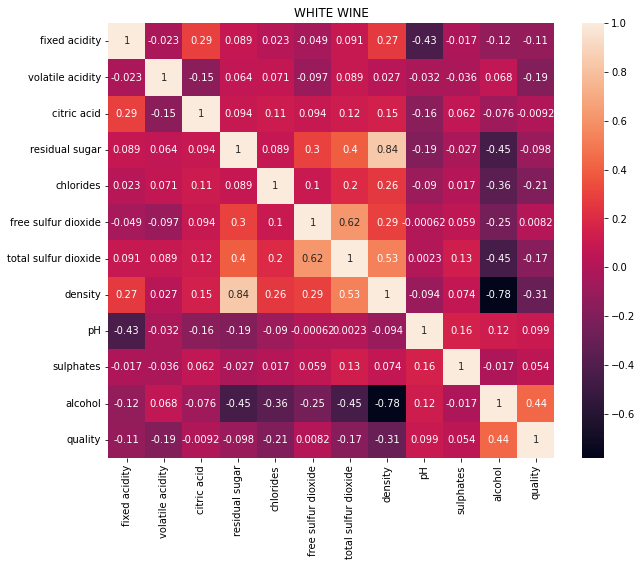

In [27]:
fig,ax2=plt.subplots(figsize=(10,8))
ax2.set_title("WHITE WINE")
ax2=sns.heatmap(white.corr(),annot=True)
plt.show()

3. Muestra una tabla con los valores de correlación de cada variable con la variable `quality`.

In [28]:
red_corr=red.corr()['quality'].sort_values(ascending=False)[1:].rename('red_wine')
red_corr=round(red_corr,2)

white_corr=white.corr()['quality'].sort_values(ascending=False)[1:].rename('white_wine')
white_corr=round(white_corr,2)



4. Responde las siguientes preguntas:

a) ¿Existen variables que tengan correlación positiva con la variable `quality`? ¿Cuáles son?

b) ¿Existen variables que tengan correlación negativa con la variable `quality`? ¿Cuáles son?

Las variables que más correlación tienen con la calidad son:

a) Positivamente:
- *escribe aquí tus respuetas*

b) Negativamente:
- *escribe aquí tus respuetas*

5. Crea las gráficas que consideres para ver la correlación que exista entre las variables que encontraste que tienen mayor correlación con la variable `quality`.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


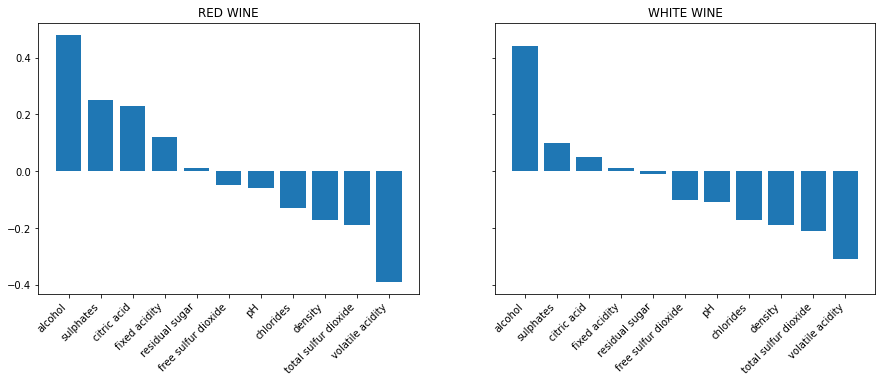

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
ax[0].bar(x=red_corr.index,height=red_corr)
ax[1].bar(x=white_corr.index,height=white_corr)
ax[0].set_title('RED WINE')
ax[1].set_title('WHITE WINE')
ax[0].set_xticklabels(red_corr.index,rotation=45,ha='right')
ax[1].set_xticklabels(red_corr.index,rotation=45,ha='right')
plt.show()

6. Responde las preguntas: 

a) ¿Existen variables correlacionadas con la calidad que estén correlacionadas fuertemente entre sí?

b) ¿Esta información para que nos serviría?

*Escribe aquí tu respuesta.*

7. Crea gráficas de barras y de violín para ver a detalle cómo las variables que tienen correlación más fuerte con la variable `quality`, afectan a dicha variable.

- En el eje x deberán aparecer las categorías de calidad: Poor, Medium High.

- En el eje y deberá aparecer la variable correspondiente.

- Toma en cuenta los valores máximo y mínimo de cada variable para marcar los límites en el eje y.

Al finalizar obtendrás gráficas como estas:

<img src=/work/density.png>
<img src=/work/density_violin.png>


8. Responde las siguientes preguntas como conclusiones de este EDA:

a) ¿Cuáles son las variables que podrían afectarían a la calidad del vino?

b) ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?

c) ¿Cuál es la variable que más podría afectar a la calidad del vino?

*Escribe aquí tus respuestas.*

### *Clases sugeridas*:

Estadística descriptiva y EDA
- [Correlaciones](https://platzi.com/clases/2353-estadistica-descriptiva/38409-correlaciones/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Matriz de covarianza](https://platzi.com/clases/2353-estadistica-descriptiva/38410-matriz-de-covarianza/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Correlación](https://platzi.com/clases/2178-analisis-exploratorio-datos/34151-correlacion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas
- [Relation (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47951-relation/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Heatmap (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47953-heatmap/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Jointplot y Pairplot (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47952-jointplot-y-pairplot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Bar Plot (Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47944-bar-plot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Violin plot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Siguientes pasos 🚀

---

¡Muchas felicidades! Has creado tu primer proyecto de análisis exploratorio de datos.

Es importante que recuerdes que dentro del análisis exploratorio de datos hay múltiples caminos y herramientas de acuerdo a lo que quieras lograr. Podríamos ir más allá en la manipulación y análisis de datos. Incluso podríamos utilizar machine learning para validar nuestra hipótesis.

En este momento ya tienes **el primer proyecto para tu portafolio profesional**. Para seguir avanzando en tu carrera te recomendamos el [Curso para Crear tus Proyectos de Ciencia de Datos](https://platzi.com/cursos/proyectos-data-science/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y el [Curso para Conseguir Trabajo en Tecnología](https://platzi.com/cursos/conseguir-trabajo-tech/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y tendrás todo para unirte a una startup como Data Analyst o Data Scientist. #StartupReady 🚀

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fefa37de-59d3-452e-9c0c-f37e07afef59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>